In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# for creating animations
import matplotlib.animation
from IPython.display import HTML

In [6]:
N = 50
xgrid = np.linspace(-1, 1, N)
ygrid = np.linspace(-1, 1, N)
grid = np.array(np.meshgrid(xgrid, ygrid)).reshape(2, len(xgrid)**2)

In [7]:
grid

array([[-1.        , -0.95918367, -0.91836735, ...,  0.91836735,
         0.95918367,  1.        ],
       [-1.        , -1.        , -1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [8]:
W = np.array(((1.5, 0.5),(0.5, 1.5)))
print(W)

[[1.5 0.5]
 [0.5 1.5]]


In [9]:
tgrid = W @ grid

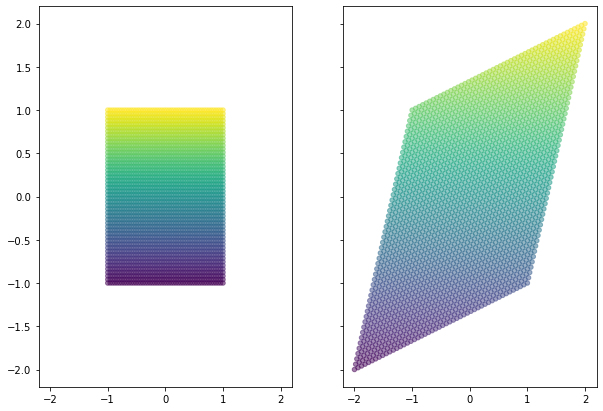

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,7), sharex=True,sharey=True)

ax1.scatter(grid[0], grid[1], s=20, alpha=0.5, c=grid[1]);
ax2.scatter(tgrid[0], tgrid[1], s=20, alpha=0.5, c=tgrid[1]);

In [11]:
def stepwise_transform(a, points, nsteps=30):
    # create empty array of the right size
    transgrid = np.zeros((nsteps+1,) + np.shape(points))
    # compute intermediate transforms
    for j in range(nsteps+1):
        intermediate = np.eye(2) + j/nsteps*(a - np.eye(2)) 
        transgrid[j] = np.dot(intermediate, points) # apply intermediate matrix transformation
    return transgrid

# Apply to x-y grid
steps = 20
transform = stepwise_transform(W, grid, nsteps=steps)

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlim([-2.1,2.1])
ax.set_ylim([-2.1,2.1])
scat = ax.scatter(*grid,c=grid[1]);

def animate(i):
    if i > steps:
        scat.set_offsets(transform[-1].T)
    else:
        scat.set_offsets(transform[i].T)
                     
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=steps*2, interval=50);
plt.close()
HTML(ani.to_html5_video())

Now, lets visualize the 

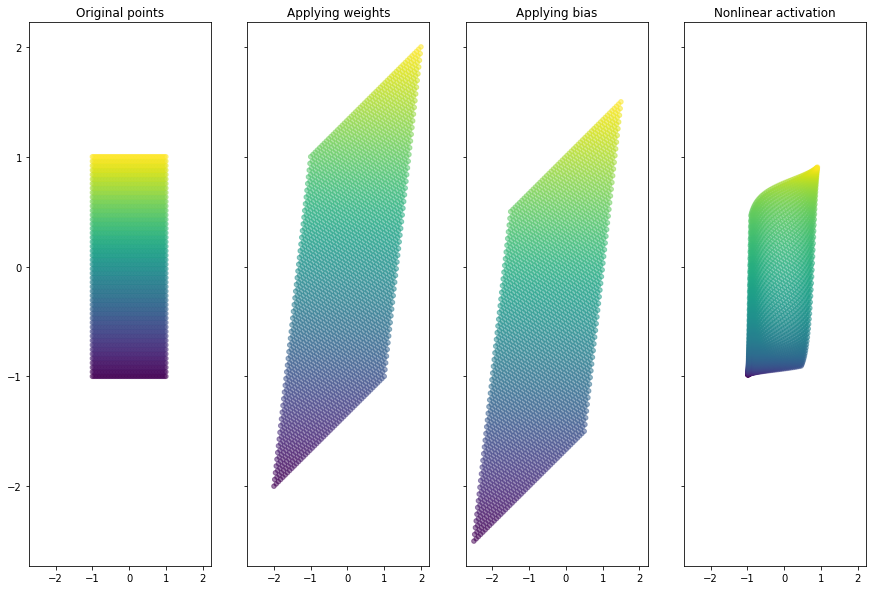

In [14]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,10), sharex=True,sharey=True)

ax1.scatter(grid[0], grid[1], s=20, alpha=0.5, c=grid[1]);
ax1.set_title('Original points');

ax2.scatter(tgrid[0], tgrid[1], s=20, alpha=0.5, c=tgrid[1]);
ax2.set_title('Applying weights');

ax3.scatter(tgrid[0]-0.5, tgrid[1]-0.5, s=20, alpha=0.5, c=tgrid[1]);
ax3.set_title('Applying bias');

ax4.scatter(np.tanh(tgrid[0]-0.5), np.tanh(tgrid[1]-0.5), s=20, alpha=0.5, c=tgrid[1]);
ax4.set_title('Nonlinear activation');

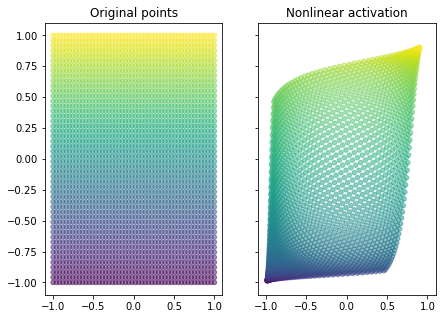

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7,5), sharex=True,sharey=True)

ax1.scatter(grid[0], grid[1], s=20, alpha=0.5, c=grid[1]);
ax1.set_title('Original points');

ax2.scatter(np.tanh(tgrid[0]-0.5), np.tanh(tgrid[1]-0.5), s=20, alpha=0.5, c=tgrid[1]);
ax2.set_title('Nonlinear activation');